# Початок роботи з бібліотекою MatplotLib

У даній лабораторній роботі розглянуто наступний функціонал бібліотеки MatplotLib:
1. Побудова двомірних графіків.
2. Побудова гістограми.
3. Побудова 3D поверхонь.

## Імпорт бібліотек та пакетів

Завантажуємо бібліотеку **Мatplotlib** та використаємо скорочення **plt**.

In [1]:
import matplotlib.pyplot as plt

Оскільки будем працювати з багатомірними масивами, імпортуємо бібліотеку **NumPy**.

In [2]:
import numpy as np

Імпортуємо бібліотеку **Рandas** для обробки та аналізу даних

In [3]:
import pandas as pd

Імпортуємо бібліотеку візуалізації даних **Seaborn** на базі **Мatplotlib** 

In [4]:
import seaborn as sns

Знизимо рівень логування для **matplotlib**

In [5]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

## Відображення сінус функції 

### Оласть значень функції
Для створення послідовностей чисел, в NumPy є функція arange (), повертає масиви, приймає не тільки цілі значення
### Синтаксис функції
    t = numpy.arange(start, stop, step)
Параметри:
* **start** - Початок інтервалу. Інтервал включає це значення. Початковим значенням за замовчування є 0. <br>
* **stop** - Кінець інтервалу. Інтервал не включає це значення.<br>
* **step** - Крок інтервалу, за замовчуванням 0. <br>

In [6]:
t = np.arange(0.0, 2.0, 0.01)

### Функція
Для роботи з сигналами, в пакеті NumPy є набір гармонічних функцій
### Синтаксис функції
   s = numpy.sin(x)
Параметри:
* **х** - Кут, в радіанах . <br>


In [7]:
s = np.sin(2 * np.pi * t)

### Відображення графіку

### Функція
Друкує функцію у(х)
### Синтаксис функції
   ax.plot(х, у, c,linewidth)
Параметри:
* **х, у** - Масив точок функції. <br>
* **с** - колір лінії.
* **linewidth** - товщина лінії.

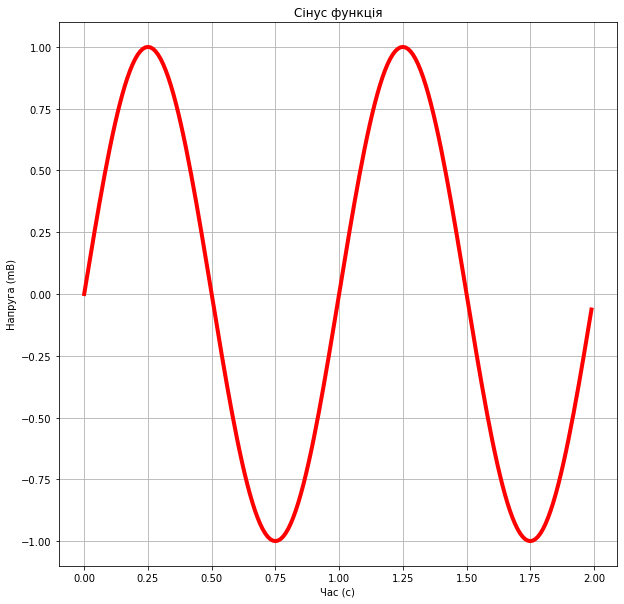

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(t, s, c='r',linewidth=4.0)

ax.set(xlabel='Час (с)', ylabel='Напруга (mВ)', title='Сінус функція')
ax.grid()

fig.savefig("test.png")
plt.show()

## Побудова гістограмми нормального розподілу

### Вихідні данні

Для отримання нормального розподілу чисел, використаємо генерацію великої кількості псевдовипадкових величин. Закон великих чисел стверджує, що такий розподіл буде нормальним.
Оскільки модуль NumPy генерує псевдовипадкові числа, задамо початкове значення для генерації. Генератор отримує дане число і від нього створює випадкові із нормальним статистичним розподілом. Функція **np.random.seed()** задає початкове значення, надалі генератор буде використовувати це значення і буде створювати одну і ту ж послідовність. 

In [9]:
np.random.seed(19680801)

Задамо медіану розподілення, середнє відхилення та кількість стовпців у гістограммі

In [10]:
mu = 100  # медіана
sigma = 15  # середнє відхилення
num_bins = 50

### Функція
Для генерації випадкових величин у NumPy використовується функція np.random.randn()
### Синтаксис функції
   np.random.randn(d0, d1, ..., dn)
Параметри:
* **d0, d1, …, dn** - Розміри масиву, що повертається. <br>


In [11]:
x_hist = mu + sigma * np.random.randn(450)

### Відображення гістограмми

### Синтаксис функції
  matplotlib.pyplot.hist(x, num_bins, density=1)
Параметри:
* **х** - Массив вхідних значень. <br>
* **num_bins** - кількість стовпців
* **density** - нормалізація вхідних даних (True або False)

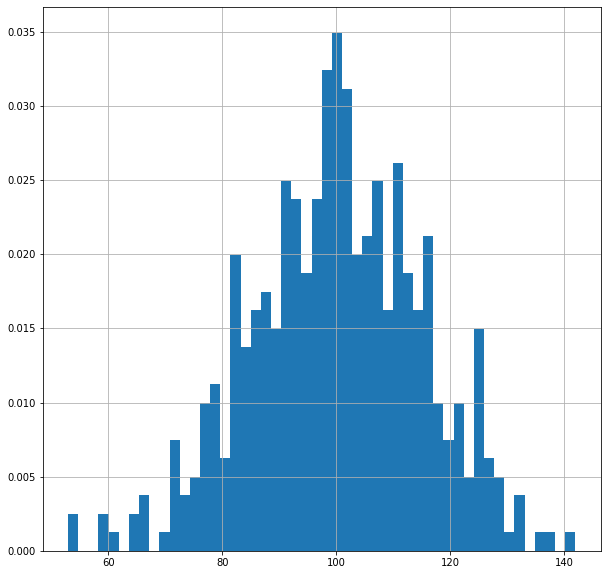

In [12]:
fig, ax = plt.subplots(figsize=(10,10))

# the histogram of the data
ax.hist(x_hist, num_bins, density=1)
plt.grid();
plt.show()

### Відображення на гістограммі графіку функції нормального розподілу

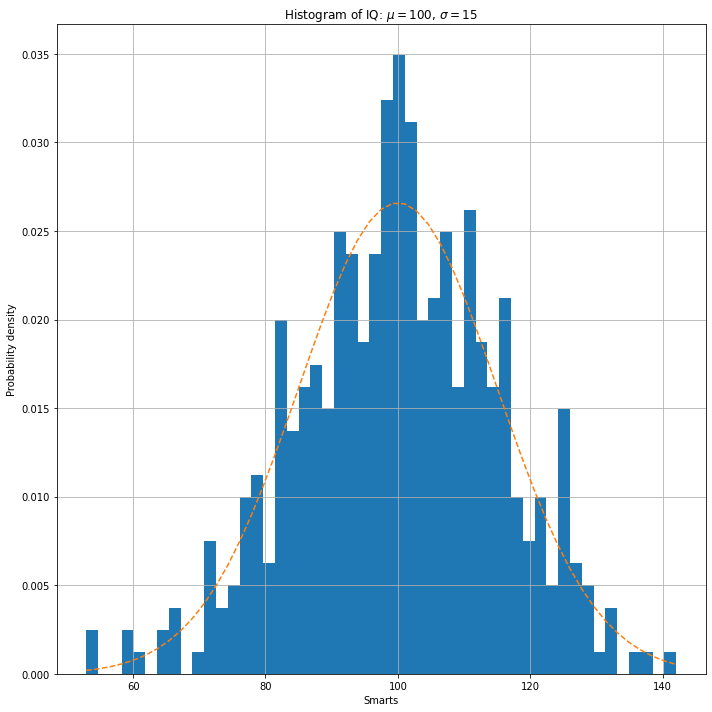

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
n, bins, patches = ax.hist(x_hist, num_bins, density=1)

# add a 'best fit' line
y_hist = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y_hist, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.grid();
plt.show()

##  Побудова 3D поверхонь

## Нормальний (Гаусовий) розподіл

Імпортуємо функцію нормального розподілу з пакету **Scipy**

### Синтаксис функції
  scipy.stats.multivariate_normal(x, min, cov)
Параметри:
* **х** - Массив вхідних значень. <br>
* **mean** - середнє відхилення (за замовчанням 0)
* **cov** - коваріаційна матриця розподілу (за замовчанням 1)

In [14]:
from scipy.stats import multivariate_normal

Імпортуємо функцію побудови 3D поверхні з пакету **mpl_toolkits**

In [15]:
from mpl_toolkits.mplot3d import Axes3D

### Задаємо вихідні параметри

In [16]:
mu_x = 0
variance_x = 20
mu_y = 0
variance_y = 20

### Створюємо сітку та поверхню нормального розподілу

In [17]:
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X_g, Y_g = np.meshgrid(x,y)
pos = np.empty(X_g.shape + (2,))
pos[:, :, 0] = X_g; pos[:, :, 1] = Y_g
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

### Створюємо  3D поверхоню

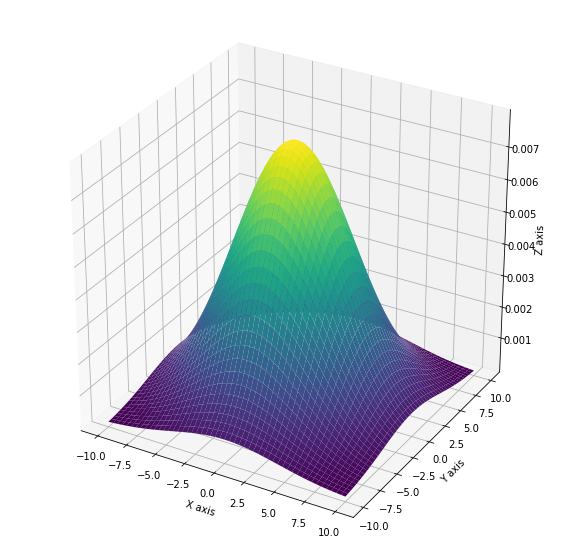

In [18]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(X_g, Y_g, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

## Sinc функція

Імпортуємо з пакету **matplotlib** кольорову мапу

In [19]:
from matplotlib import cm

### Створюємо сітку та поверхню нормального розподілу

In [20]:
x=np.linspace(-3,3,256) 
y=np.linspace(-3,3,256)
X,Y=np.meshgrid(x,y)

### Створюємо Sinc функцію та її поверхню

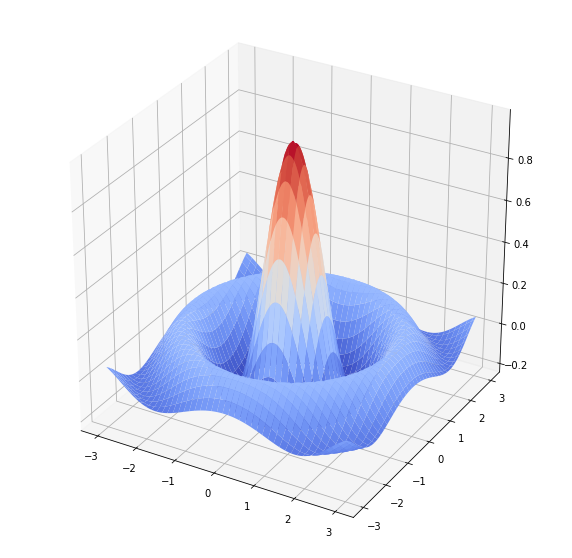

In [21]:
Z=np.sinc(np.sqrt(X**2 + Y**2))

fig=plt.figure(figsize=(10,10))
ax=fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,Z, cmap=cm.coolwarm)
plt.show()

## Точковий графік (Scatteplot)

Імпортуємо датасет із даними для побудови точкового графіку

In [23]:
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

### Підготовка даних

Знайдемо унікальні дані в стовпці *'category'*

In [24]:
categories = np.unique(midwest['category'])

Надамо кожній унікальній категорії свій колір за допомогою кольорової мапи *plt.cm.tab10*

In [25]:
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

Створимо графік для кожної категорії

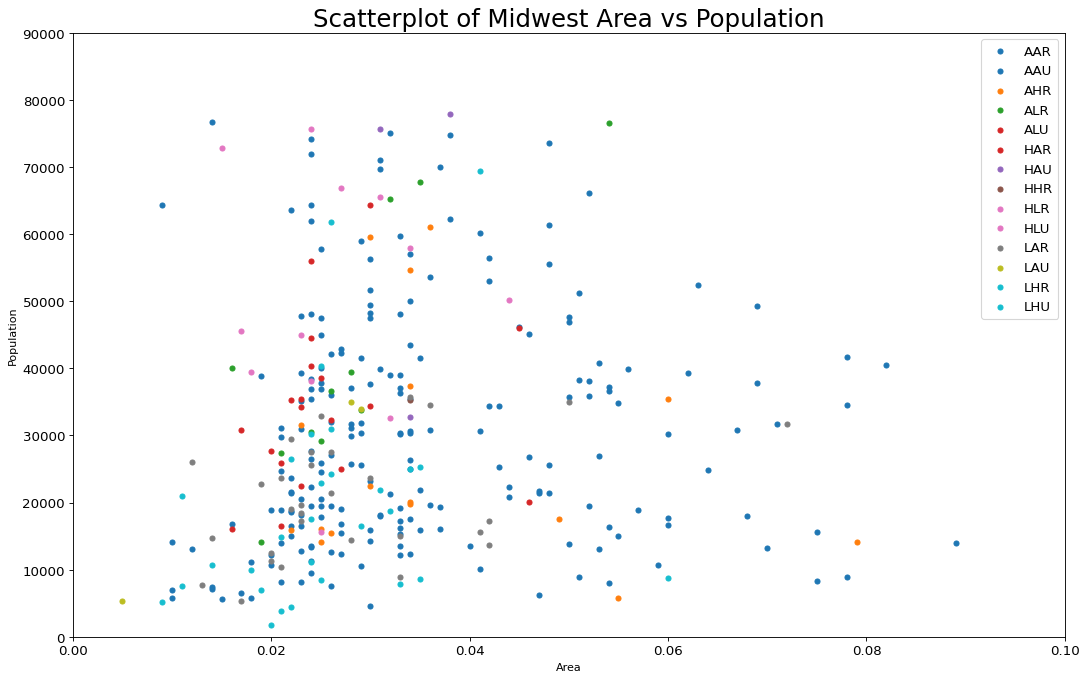

In [26]:
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s=20, c=colors[i], label=str(category))
    
# Додамо назви осей та підписи даних

plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)    
plt.show()  

## Subplot

### Функція
Друкує серію графіків функції у(х)
### Синтаксис функції
   add_subplot(pos)
Параметри:
* **pos** - позиція графіку на subplot. Позиція задається, зазвичай, трьома числами, наприклад (2,2,1). Перша цифра - кількість рядків. Друга - кількість столбців. Третя - позиція на якій буде побудовано графік(відлік починається з першого графік).

Побудуємо графіки, які були вище разом

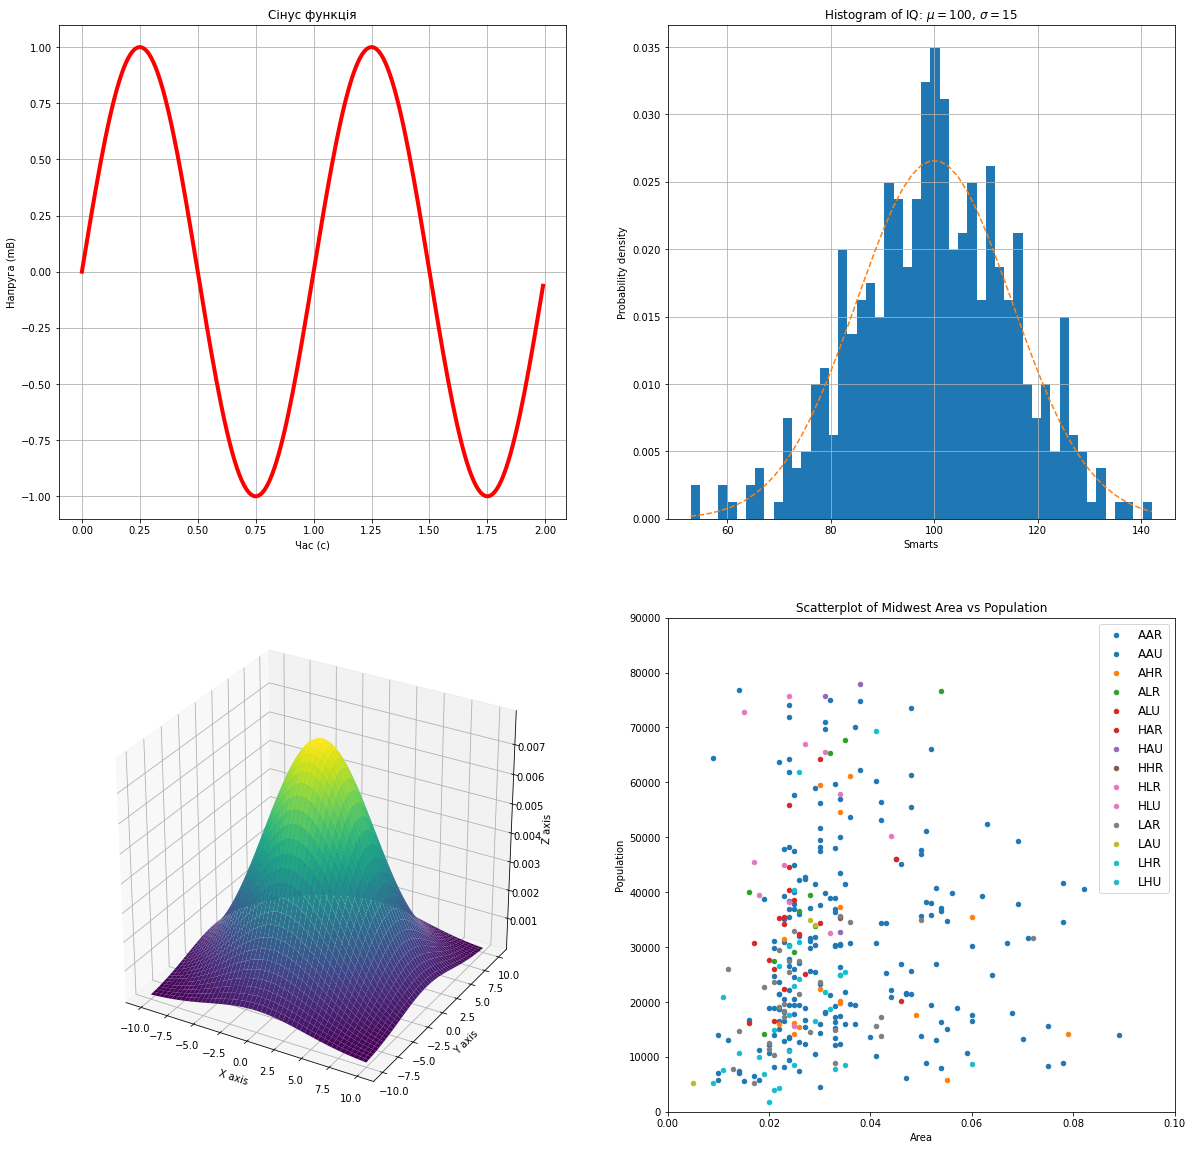

In [27]:
fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(t, s, c='r',linewidth=4.0)
ax1.set(xlabel='Час (с)', ylabel='Напруга (mВ)', title='Сінус функція')
ax1.grid()

ax2 = fig.add_subplot(2, 2, 2)
ax2.hist(x_hist, num_bins, density=1)
ax2.plot(bins, y_hist, '--')
ax2.set_xlabel('Smarts')
ax2.set_ylabel('Probability density')
ax2.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')
ax2.grid()

ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.plot_surface(X_g, Y_g, rv.pdf(pos),cmap='viridis',linewidth=0)
ax3.set_xlabel('X axis')
ax3.set_ylabel('Y axis')
ax3.set_zlabel('Z axis')
ax3.grid()

ax4 = fig.add_subplot(2, 2, 4)
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s=20, c=colors[i], label=str(category))
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population', title='Scatterplot of Midwest Area vs Population')
ax4.legend(fontsize=12)

plt.show()

# Завдання
## 1. Створити Subplot із  4 графіків сінусоїди з різними частотами

1.1. Сформувати діапазон функції від 0 до 2 з кроком 0.01

In [28]:
t = np.arange(0,2,0.01)

1.2 Сформувати частоти сінусоїди

In [29]:
s1 = np.sin(25*t*np.pi)
s2 = np.sin(15*t*np.pi)
s3 = np.sin(10*t*np.pi)
s4 = np.sin(5*t*np.pi)

1.3 Надрукувати графіки

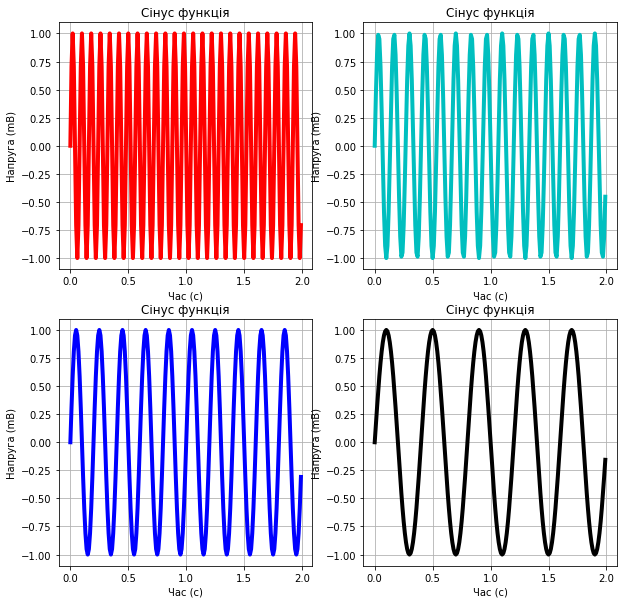

In [31]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(t, s1, c='r',linewidth=4.0)
ax1.set(xlabel='Час (с)', ylabel='Напруга (mВ)', title='Сінус функція')
ax1.grid()

ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(t, s2, c='c',linewidth=4.0)
ax2.set(xlabel='Час (с)', ylabel='Напруга (mВ)', title='Сінус функція')
ax2.grid()

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(t, s3, c='b',linewidth=4.0)
ax3.set(xlabel='Час (с)', ylabel='Напруга (mВ)', title='Сінус функція')
ax3.grid()

ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(t, s4, c='black',linewidth=4.0)
ax4.set(xlabel='Час (с)', ylabel='Напруга (mВ)', title='Сінус функція')
ax4.grid()

plt.show()